<a href="https://colab.research.google.com/github/sam4food/ics635-hw01/blob/main/ICS_635_Hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Data Preprocessing

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model

### Default Settings

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#### Default Settings Evaluation


=== K-Nearest Neighbors Performance ===
Accuracy: 0.9474

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


=== Decision Tree Performance ===
Accuracy: 0.9474

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


=== Random Forest Performance ===
Accuracy: 0.9649

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy     

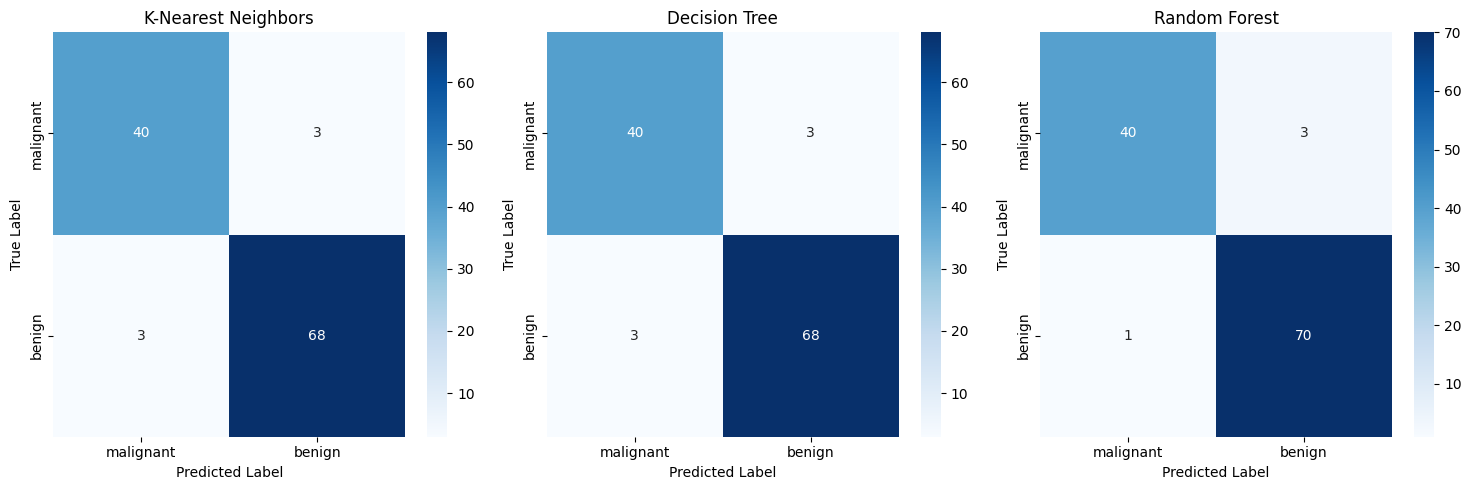

In [5]:
models = {
    "K-Nearest Neighbors": knn_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

conf_matrices = {name: confusion_matrix(y_test, pred) for name, pred in models.items()}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (model_name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

## Abalation Study

### Less Neighbors for KNN


=== K-Nearest Neighbors (n_neighbors=1) Performance ===
Accuracy: 0.9386

              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



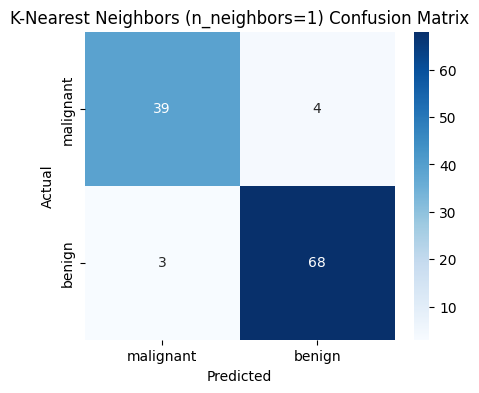

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_pred)
print("\n=== K-Nearest Neighbors (n_neighbors=1) Performance ===")
print(f"Accuracy: {knn_accuracy:.4f}\n")
print(classification_report(y_test, knn_pred, target_names=data.target_names))

knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors (n_neighbors=1) Confusion Matrix")
plt.show()

### More Neighbors for KNN


=== K-Nearest Neighbors (n_neighbors=9) Performance ===
Accuracy: 0.9649

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



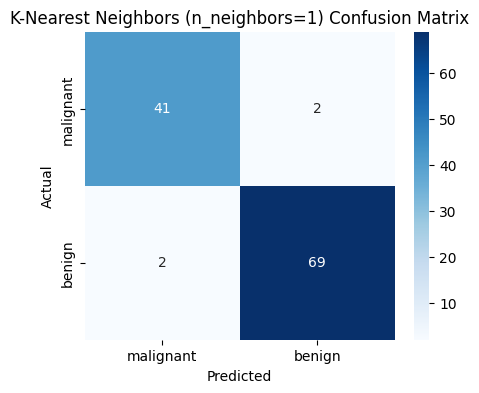

In [7]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_pred)
print("\n=== K-Nearest Neighbors (n_neighbors=9) Performance ===")
print(f"Accuracy: {knn_accuracy:.4f}\n")
print(classification_report(y_test, knn_pred, target_names=data.target_names))

knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors (n_neighbors=1) Confusion Matrix")
plt.show()

### max_depth=1 for Decision Tree


=== Decision Tree (max_depth=1) Performance ===
Accuracy: 0.8947

              precision    recall  f1-score   support

   malignant       0.83      0.91      0.87        43
      benign       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



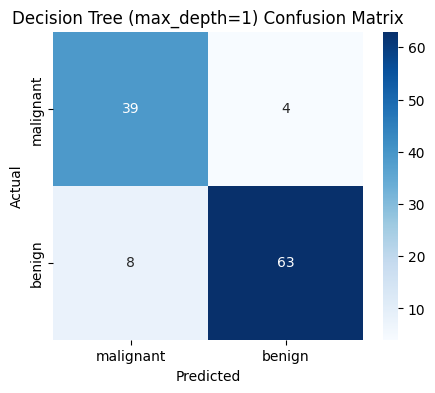

In [8]:
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("\n=== Decision Tree (max_depth=1) Performance ===")
print(f"Accuracy: {dt_accuracy:.4f}\n")
print(classification_report(y_test, dt_pred, target_names=data.target_names))

dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree (max_depth=1) Confusion Matrix")
plt.show()


### max_depth=10 for Decision Tree


=== Decision Tree (max_depth=10) Performance ===
Accuracy: 0.9474

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



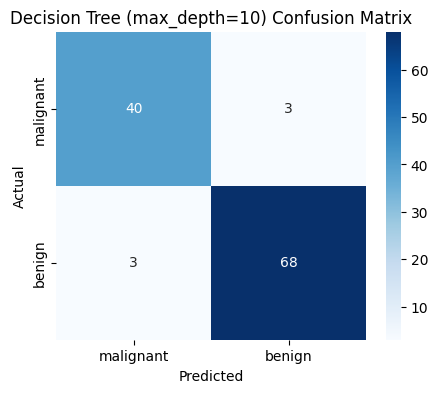

In [9]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("\n=== Decision Tree (max_depth=10) Performance ===")
print(f"Accuracy: {dt_accuracy:.4f}\n")
print(classification_report(y_test, dt_pred, target_names=data.target_names))

dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree (max_depth=10) Confusion Matrix")
plt.show()

### n_estimators=10 for Random Forest


=== Random Forest (n_estimators=10) Performance ===
Accuracy: 0.9561

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



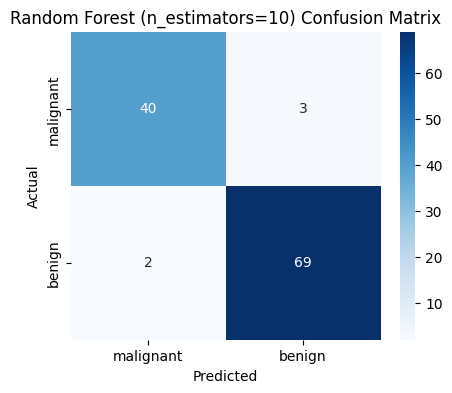

In [10]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=10) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=10) Confusion Matrix")
plt.show()

#### n_estimators=10 max_depth=1 Random Forest


=== Random Forest (n_estimators=10, max_depth=1) Performance ===
Accuracy: 0.9561

              precision    recall  f1-score   support

   malignant       1.00      0.88      0.94        43
      benign       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



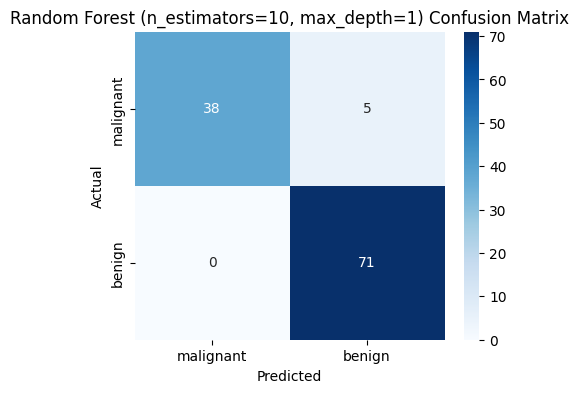

In [11]:
rf = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=10, max_depth=1) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=10, max_depth=1) Confusion Matrix")
plt.show()

#### n_estimators=10 max_depth=10 Random Forest


=== Random Forest (n_estimators=10, max_depth=10) Performance ===
Accuracy: 0.9561

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



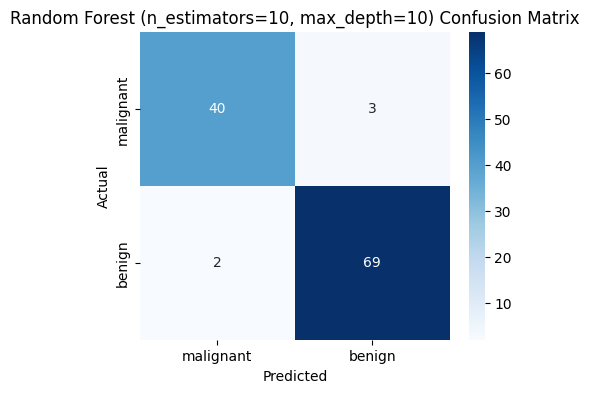

In [12]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=10, max_depth=10) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=10, max_depth=10) Confusion Matrix")
plt.show()

### n_estimators=200 for Random Forest


=== Random Forest (n_estimators=200) Performance ===
Accuracy: 0.9649

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



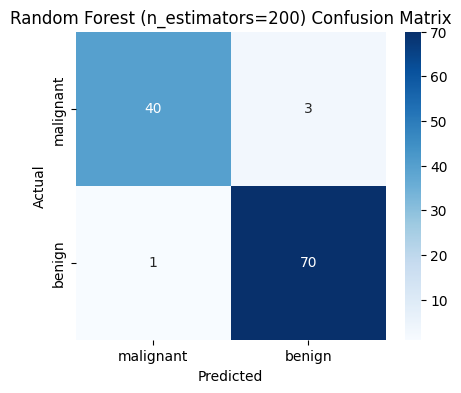

In [13]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=200) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=200) Confusion Matrix")
plt.show()

#### n_estimators=200 max_depth=1 Random Forest


=== Random Forest (n_estimators=200, max_depth=1) Performance ===
Accuracy: 0.9561

              precision    recall  f1-score   support

   malignant       1.00      0.88      0.94        43
      benign       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



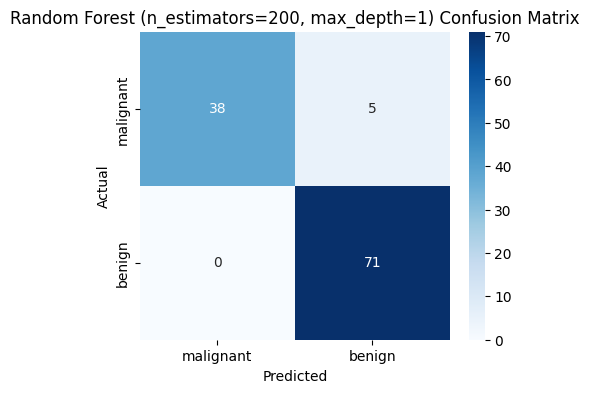

In [14]:
rf = RandomForestClassifier(n_estimators=200, max_depth=1, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=200, max_depth=1) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=200, max_depth=1) Confusion Matrix")
plt.show()

n_estimators=200 max_depth=10 Random Forest


=== Random Forest (n_estimators=200, max_depth=10) Performance ===
Accuracy: 0.9649

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



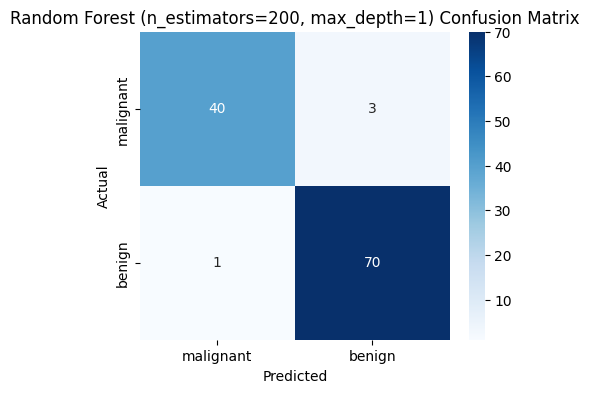

In [15]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n=== Random Forest (n_estimators=200, max_depth=10) Performance ===")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=data.target_names))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (n_estimators=200, max_depth=1) Confusion Matrix")
plt.show()